In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('http://bit.ly/uforeports')
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
df.shape

(18241, 5)

In [5]:
df.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

###### Convert argument to datetime

# https://pandas.pydata.org/pandas-docs/version/0.13/generated/pandas.to_datetime.html

In [6]:
df['Time'] = pd.to_datetime(df.Time)

In [7]:
df.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00
18240,Ybor,NaN,OVAL,FL,2000-12-31 23:59:00


In [8]:
df.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

# https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#datetimeindex

Datetimelike Properties
Series.dt can be used to access the values of the series as datetimelike and return several properties. These can be accessed like Series.dt.<property>.

In [9]:
df.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
5        5
6        5
7        2
8        3
9        1
10       6
11       3
12       4
13       4
14       6
15       2
16       2
17       0
18       2
19       4
20       1
21       6
22       6
23       4
24       5
25       5
26       5
27       6
28       3
29       4
        ..
18211    3
18212    3
18213    3
18214    4
18215    4
18216    4
18217    4
18218    4
18219    4
18220    4
18221    4
18222    4
18223    4
18224    4
18225    5
18226    5
18227    5
18228    6
18229    6
18230    6
18231    6
18232    6
18233    6
18234    6
18235    6
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [10]:
df.Time.dt.weekday_name

0           Sunday
1           Monday
2           Sunday
3           Monday
4          Tuesday
5         Saturday
6         Saturday
7        Wednesday
8         Thursday
9          Tuesday
10          Sunday
11        Thursday
12          Friday
13          Friday
14          Sunday
15       Wednesday
16       Wednesday
17          Monday
18       Wednesday
19          Friday
20         Tuesday
21          Sunday
22          Sunday
23          Friday
24        Saturday
25        Saturday
26        Saturday
27          Sunday
28        Thursday
29          Friday
           ...    
18211     Thursday
18212     Thursday
18213     Thursday
18214       Friday
18215       Friday
18216       Friday
18217       Friday
18218       Friday
18219       Friday
18220       Friday
18221       Friday
18222       Friday
18223       Friday
18224       Friday
18225     Saturday
18226     Saturday
18227     Saturday
18228       Sunday
18229       Sunday
18230       Sunday
18231       Sunday
18232       

In [11]:
df.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
5        15
6         0
7         0
8        17
9         0
10       21
11       20
12       20
13        2
14       13
15       11
16        0
17       22
18        1
19       23
20       15
21        0
22        0
23       11
24       10
25       12
26       12
27       11
28       12
29       10
         ..
18211    18
18212    18
18213    19
18214     0
18215     9
18216    16
18217    19
18218    20
18219    20
18220    20
18221    20
18222    21
18223    22
18224    23
18225    10
18226    22
18227    22
18228     4
18229    11
18230    20
18231    20
18232    20
18233    21
18234    22
18235    23
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [12]:
df.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
5        258
6        166
7        197
8        289
9        166
10       227
11       152
12       181
13       188
14       152
15       183
16        56
17       152
18       196
19       120
20       152
21       227
22       227
23       288
24         1
25         1
26         1
27        93
28       153
29       182
        ... 
18211    363
18212    363
18213    363
18214    364
18215    364
18216    364
18217    364
18218    364
18219    364
18220    364
18221    364
18222    364
18223    364
18224    364
18225    365
18226    365
18227    365
18228    366
18229    366
18230    366
18231    366
18232    366
18233    366
18234    366
18235    366
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [17]:
df.Time.dt.date.tail()

18236    2000-12-31
18237    2000-12-31
18238    2000-12-31
18239    2000-12-31
18240    2000-12-31
Name: Time, dtype: object

let use a timestamp as part of comparison

In [19]:
ts = pd.to_datetime('1-12-2000')

In [20]:
df.loc[df.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
15702,Northbrook,NaN,DISK,IL,2000-01-12 00:22:00
15703,Los Angeles,YELLOW BLUE,DISK,CA,2000-01-12 01:31:00
15704,Snohomish,NaN,TRIANGLE,WA,2000-01-12 18:20:00
15705,Galesburg,ORANGE,FIREBALL,IL,2000-01-13 00:00:00
15706,Jacksonville,NaN,NaN,FL,2000-01-13 03:00:00
15707,Pine Mountain,NaN,LIGHT,AR,2000-01-13 06:30:00
15708,Phoenix,NaN,CIRCLE,AZ,2000-01-13 15:45:00
15709,Louisville,BLUE,FIREBALL,KY,2000-01-13 22:30:00
15710,Mt. Vernon,RED,DISK,WA,2000-01-14 06:30:00
15711,Houston,NaN,DISK,TX,2000-01-14 12:25:00


In [23]:
df.Time.dt.year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
1996     851
1994     406
1978     326
1975     312
1993     292
1976     281
1974     261
1977     258
1989     247
1992     245
1980     244
1990     237
1979     237
1988     232
1973     227
1991     220
1968     218
1985     211
1987     210
1966     203
1967     196
1965     195
1986     186
1982     186
1984     177
        ... 
1957      78
1962      72
1960      67
1959      57
1954      55
1958      53
1952      52
1961      50
1956      46
1947      41
1953      36
1955      33
1950      31
1951      21
1949      19
1945       9
1948       9
1944       8
1946       8
1943       5
1939       3
1942       3
1931       2
1930       2
1937       2
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Time, Length: 68, dtype: int64

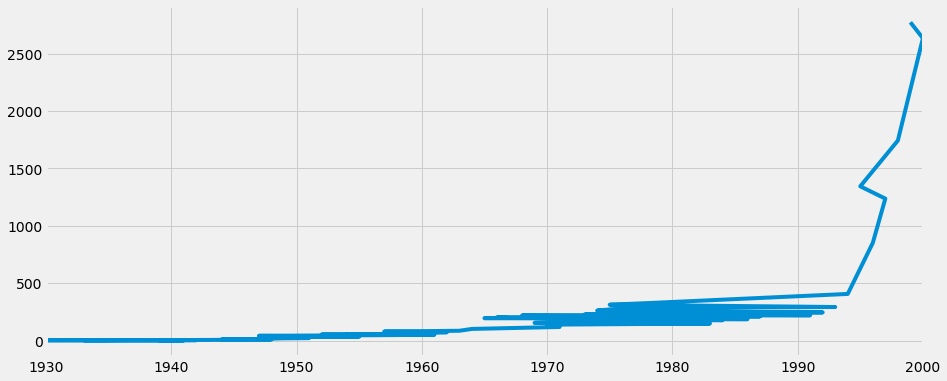

In [28]:
df.Time.dt.year.value_counts().plot()
plt.show()

###### Adding Month or Year column

In [29]:
df['Year'] = df.Time.dt.year

In [31]:
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [33]:
df['Month'] = df.Time.dt.month
df.head(30)

,City,Colors Reported,Shape Reported,State,Time,Year,Month
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,1934,9
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,1935,6
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00,1936,7
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00,1936,10
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00,1937,6
